<a href="https://colab.research.google.com/github/Nadira173/Portofolio-Nadira/blob/main/Sentimen_Publik_Terhadap_Anggaran_RP_10_000_untuk_Makan_Siang_Bergizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sentimen Publik Terhadap Anggaran RP 10.000 untuk Makan Siang Bergizi

#Latar Belakang

Program makan siang gratis direncanakan untuk memberikan makanan bergizi dan susu kepada 83 juta anak sekolah, balita, serta ibu hamil, dengan tujuan mengurangi stunting, meningkatkan kecukupan gizi, perkembangan kognitif, dan menekan angka putus sekolah.

Awalnya, program ini diberi pendanaan Rp15.000/porsi, namun mengalami pengurangan dana yaitu menjadi Rp10.000/porsi. Program ini membutuhkan pendanaan besar, mencapai Rp100 triliun pada tahun pertama dan hingga Rp460 triliun per tahun pada 2029, yang dapat membebani anggaran negara dan memengaruhi stabilitas fiskal.
Program menghadapi tantangan logistik, distribusi, adaptasi terhadap kebiasaan lokal, pengurangan limbah makanan, serta pengelolaan kebutuhan nutrisi yang berbeda.

Kritik datang dari lembaga internasional terkait dampak pada fiskal dan potensi ketergantungan masyarakat. Implementasi membutuhkan tata kelola yang baik, transparansi keuangan, dan perencanaan matang untuk mengoptimalkan manfaat


# Crawling Data


Data diambil dan dikumpulkan dari twitter.

untuk collab pengambilan data bisa diakses melalui link ini:
[Crawling Group B](https://s.id/CrawlingG2)

#Load Data

In [ ]:
!pip install squarify
!pip install Sastrawi
!pip install unidecode

import itertools, re, pickle
import time, operator, numpy as np, matplotlib.pyplot as plt, pandas as pd, seaborn as sns
import networkx as nx
import squarify
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.colors as mcolors
import nltk

from nltk.tokenize import word_tokenize
from matplotlib.colors import ListedColormap
from textblob import TextBlob
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from unidecode import unidecode
from nltk.tag import CRFTagger
from html import unescape
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from tqdm import tqdm
from wordcloud import WordCloud

"DONE!!!"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 4.6 MB/s eta 0:00:00


'DONE!!!'

In [ ]:
tekses = [
    "anggaran_makan_bergizi(NovDes2024).csv",
    "makan_bergizi(NovDes2024).csv",
    "makan_bergizi_rp10.000(NovDes2024).csv",
    "makan_siang_10.000(NovDes2024).csv",
    "makan_siang_gratis(NovDes2024).csv",
    "makanan_bergizi_anggaran_10rb(NovDes2024).csv",
    "Rp10ribu_makanan_bergizi(NovDes2024).csv",
    "makan_bergizi_gratis(NovDes2024).csv",
    "makan_siang_gratis_prabowo(NovDes2024).csv",
    "janji_makan_siang_gratis(NovDes2024).csv",
    "makan_siang_gratis_sekolah(NovDes2024).csv",
                                                ]

dataset = {}
for data in tekses:
    dataset[f'{data[:-16]}'] = pd.read_csv(f'https://raw.githubusercontent.com/Jepees/Data-Mining-Dani/refs/heads/main/CapStone-02%20(UAS)/tweets-data/{data}')

for i in dataset.keys():
    print(i)

anggaran_makan_bergizi
makan_bergizi
makan_bergizi_rp10.000
makan_siang_10.000
makan_siang_gratis
makanan_bergizi_anggaran_10rb
Rp10ribu_makanan_bergizi
makan_bergizi_gratis
makan_siang_gratis_prabowo
janji_makan_siang_gratis
makan_siang_gratis_sekolah


In [ ]:
df = pd.concat(dataset.values(), ignore_index=True)
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.867736e+18,Sat Dec 14 21:14:07 +0000 2024,0,@ferrykoto @PDI_Perjuangan @prabowo Anggaran r...,1.868042e+18,NaN,ferrykoto,in,Mooloolaba,0,0,0,https://x.com/hendriamin/status/18680418066399...,6.049976e+07,hendriamin
1,1.867872e+18,Sat Dec 14 10:00:02 +0000 2024,3,Ketum PDIP Megawati Soekarnoputri mengkritik a...,1.867872e+18,NaN,NaN,in,NaN,0,0,0,https://x.com/detikcom/status/1867872168211624343,6.918316e+07,detikcom
2,1.867859e+18,Sat Dec 14 09:06:31 +0000 2024,5,Gus Menko @cakimiNOW merespons usulan Ketum PD...,1.867859e+18,NaN,NaN,in,"DKI Jakarta, Indonesia",0,0,2,https://x.com/Cak_Didi/status/1867858698082947297,1.299314e+09,Cak_Didi
3,1.867838e+18,Sat Dec 14 07:43:28 +0000 2024,0,Presiden: Anggaran makan bergizi gratis Rp10.0...,1.867838e+18,NaN,NaN,in,NaN,0,0,0,https://x.com/taksuka/status/1867837797903794415,8.105888e+07,taksuka
4,1.867491e+18,Sat Dec 14 06:17:42 +0000 2024,0,@Anak__Ogi @IrawanRommi 10 ribu biaya yg di be...,1.867816e+18,NaN,Anak__Ogi,in,NaN,0,0,0,https://x.com/Sasmo_kliwon/status/186781621389...,1.162698e+09,Sasmo_kliwon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,1.857450e+18,Fri Nov 15 15:44:28 +0000 2024,0,youth development emak emaknya bocil indo lebi...,1.857450e+18,NaN,NaN,in,NaN,0,0,0,https://x.com/hwankkyu/status/1857449596949332115,1.355718e+18,hwankkyu
3061,1.857075e+18,Fri Nov 15 13:41:43 +0000 2024,4,@anggadwia_ Kan biar anak² sekolah bisa makan ...,1.857419e+18,NaN,anggadwia_,in,NaN,0,0,0,https://x.com/arorossy/status/1857418706261078445,7.032722e+07,arorossy
3062,1.857104e+18,Fri Nov 15 06:35:58 +0000 2024,0,@txtdengardulu Makan siang gratis di sekolah a...,1.857312e+18,NaN,txtdengardulu,in,NaN,0,0,0,https://x.com/gadingwahyuu/status/185731156293...,1.855132e+18,gadingwahyuu
3063,1.857264e+18,Fri Nov 15 05:32:53 +0000 2024,0,@yvdhaisme itung wae ngopi nambah sedekah. kan...,1.857296e+18,NaN,yvdhaisme,in,yogyakarta,0,1,0,https://x.com/xxfithvl_/status/185729568768959...,1.243845e+18,xxfithvl_


In [ ]:
df_text = df[['full_text']]
df_text

,full_text
0,@ferrykoto @PDI_Perjuangan @prabowo Anggaran r...
1,Ketum PDIP Megawati Soekarnoputri mengkritik a...
2,Gus Menko @cakimiNOW merespons usulan Ketum PD...
3,Presiden: Anggaran makan bergizi gratis Rp10.0...
4,@Anak__Ogi @IrawanRommi 10 ribu biaya yg di be...
...,...
3060,youth development emak emaknya bocil indo lebi...
3061,@anggadwia_ Kan biar anak² sekolah bisa makan ...
3062,@txtdengardulu Makan siang gratis di sekolah a...
3063,@yvdhaisme itung wae ngopi nambah sedekah. kan...


#Preprocessing

In [ ]:
def remove_URL(tweet): # Menghapus URL
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)

def remove_html(tweet): # Menghapus tag HTML
    html = re.compile(r'<.*?>')
    return html.sub(r'', tweet)

def remove_emoji(tweet): # Menghapus emoji
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                            "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

def remove_username(tweet): # Menghapus username
    username_pattern = re.compile(r'@\w+')
    return username_pattern.sub(r'', tweet)

def remove_numbers (tweet): # Menghapus angka
    tweet = re.sub(r'\d+', '', tweet)
    return tweet

def remove_symbols (tweet): # Menghapus simbol
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet

# Visualisasi clean dataset 'full_text'
df_text['cleaning'] = df_text['full_text'].apply(lambda x: remove_URL(x))
df_text['cleaning'] = df_text['cleaning'].apply(lambda x: remove_html(x))
df_text['cleaning'] = df_text['cleaning'].apply(lambda x: remove_emoji(x))
df_text['cleaning'] = df_text['cleaning'].apply(lambda x: remove_username(x))
df_text['cleaning'] = df_text['cleaning'].apply(lambda x: remove_symbols(x))
df_text['cleaning'] = df_text['cleaning'].apply(lambda x: remove_numbers(x))

df_text

<ipython-input-6-8bdd85037599>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['cleaning'] = df_text['full_text'].apply(lambda x: remove_URL(x))
<ipython-input-6-8bdd85037599>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_text['cleaning'] = df_text['cleaning'].apply(lambda x: remove_html(x))
<ipython-input-6-8bdd85037599>:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

,full_text,cleaning
0,@ferrykoto @PDI_Perjuangan @prabowo Anggaran r...,Anggaran rp sangat bisa utk makan bergizi K...
1,Ketum PDIP Megawati Soekarnoputri mengkritik a...,Ketum PDIP Megawati Soekarnoputri mengkritik a...
2,Gus Menko @cakimiNOW merespons usulan Ketum PD...,Gus Menko merespons usulan Ketum PDIP Megawat...
3,Presiden: Anggaran makan bergizi gratis Rp10.0...,Presiden Anggaran makan bergizi gratis Rp per ...
4,@Anak__Ogi @IrawanRommi 10 ribu biaya yg di be...,ribu biaya yg di berikan pemerintah Pelaksa...
...,...,...
3060,youth development emak emaknya bocil indo lebi...,youth development emak emaknya bocil indo lebi...
3061,@anggadwia_ Kan biar anak² sekolah bisa makan ...,Kan biar anak sekolah bisa makan siang gratis...
3062,@txtdengardulu Makan siang gratis di sekolah a...,Makan siang gratis di sekolah adalah langkah ...
3063,@yvdhaisme itung wae ngopi nambah sedekah. kan...,itung wae ngopi nambah sedekah kan duit e ngg...


In [ ]:
df_text = df_text.drop_duplicates(subset='cleaning', keep='first')
df_text

,full_text,cleaning
0,@ferrykoto @PDI_Perjuangan @prabowo Anggaran r...,Anggaran rp sangat bisa utk makan bergizi K...
1,Ketum PDIP Megawati Soekarnoputri mengkritik a...,Ketum PDIP Megawati Soekarnoputri mengkritik a...
2,Gus Menko @cakimiNOW merespons usulan Ketum PD...,Gus Menko merespons usulan Ketum PDIP Megawat...
3,Presiden: Anggaran makan bergizi gratis Rp10.0...,Presiden Anggaran makan bergizi gratis Rp per ...
4,@Anak__Ogi @IrawanRommi 10 ribu biaya yg di be...,ribu biaya yg di berikan pemerintah Pelaksa...
...,...,...
3060,youth development emak emaknya bocil indo lebi...,youth development emak emaknya bocil indo lebi...
3061,@anggadwia_ Kan biar anak² sekolah bisa makan ...,Kan biar anak sekolah bisa makan siang gratis...
3062,@txtdengardulu Makan siang gratis di sekolah a...,Makan siang gratis di sekolah adalah langkah ...
3063,@yvdhaisme itung wae ngopi nambah sedekah. kan...,itung wae ngopi nambah sedekah kan duit e ngg...


In [ ]:
df = df[df['full_text'].isin(df_text['full_text'])]
df = df.drop_duplicates(subset='full_text', keep='first')
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1.867736e+18,Sat Dec 14 21:14:07 +0000 2024,0,@ferrykoto @PDI_Perjuangan @prabowo Anggaran r...,1.868042e+18,NaN,ferrykoto,in,Mooloolaba,0,0,0,https://x.com/hendriamin/status/18680418066399...,6.049976e+07,hendriamin
1,1.867872e+18,Sat Dec 14 10:00:02 +0000 2024,3,Ketum PDIP Megawati Soekarnoputri mengkritik a...,1.867872e+18,NaN,NaN,in,NaN,0,0,0,https://x.com/detikcom/status/1867872168211624343,6.918316e+07,detikcom
2,1.867859e+18,Sat Dec 14 09:06:31 +0000 2024,5,Gus Menko @cakimiNOW merespons usulan Ketum PD...,1.867859e+18,NaN,NaN,in,"DKI Jakarta, Indonesia",0,0,2,https://x.com/Cak_Didi/status/1867858698082947297,1.299314e+09,Cak_Didi
3,1.867838e+18,Sat Dec 14 07:43:28 +0000 2024,0,Presiden: Anggaran makan bergizi gratis Rp10.0...,1.867838e+18,NaN,NaN,in,NaN,0,0,0,https://x.com/taksuka/status/1867837797903794415,8.105888e+07,taksuka
4,1.867491e+18,Sat Dec 14 06:17:42 +0000 2024,0,@Anak__Ogi @IrawanRommi 10 ribu biaya yg di be...,1.867816e+18,NaN,Anak__Ogi,in,NaN,0,0,0,https://x.com/Sasmo_kliwon/status/186781621389...,1.162698e+09,Sasmo_kliwon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3060,1.857450e+18,Fri Nov 15 15:44:28 +0000 2024,0,youth development emak emaknya bocil indo lebi...,1.857450e+18,NaN,NaN,in,NaN,0,0,0,https://x.com/hwankkyu/status/1857449596949332115,1.355718e+18,hwankkyu
3061,1.857075e+18,Fri Nov 15 13:41:43 +0000 2024,4,@anggadwia_ Kan biar anak² sekolah bisa makan ...,1.857419e+18,NaN,anggadwia_,in,NaN,0,0,0,https://x.com/arorossy/status/1857418706261078445,7.032722e+07,arorossy
3062,1.857104e+18,Fri Nov 15 06:35:58 +0000 2024,0,@txtdengardulu Makan siang gratis di sekolah a...,1.857312e+18,NaN,txtdengardulu,in,NaN,0,0,0,https://x.com/gadingwahyuu/status/185731156293...,1.855132e+18,gadingwahyuu
3063,1.857264e+18,Fri Nov 15 05:32:53 +0000 2024,0,@yvdhaisme itung wae ngopi nambah sedekah. kan...,1.857296e+18,NaN,yvdhaisme,in,yogyakarta,0,1,0,https://x.com/xxfithvl_/status/185729568768959...,1.243845e+18,xxfithvl_


In [ ]:
df = df[df['full_text'].isin(df_text['full_text'])]
df = df.drop_duplicates(subset='full_text', keep='first')
df = df[['created_at', 'username', 'full_text', 'favorite_count', 'quote_count', 'reply_count', 'retweet_count']]
df

,created_at,username,full_text,favorite_count,quote_count,reply_count,retweet_count
0,Sat Dec 14 21:14:07 +0000 2024,hendriamin,@ferrykoto @PDI_Perjuangan @prabowo Anggaran r...,0,0,0,0
1,Sat Dec 14 10:00:02 +0000 2024,detikcom,Ketum PDIP Megawati Soekarnoputri mengkritik a...,3,0,0,0
2,Sat Dec 14 09:06:31 +0000 2024,Cak_Didi,Gus Menko @cakimiNOW merespons usulan Ketum PD...,5,0,0,2
3,Sat Dec 14 07:43:28 +0000 2024,taksuka,Presiden: Anggaran makan bergizi gratis Rp10.0...,0,0,0,0
4,Sat Dec 14 06:17:42 +0000 2024,Sasmo_kliwon,@Anak__Ogi @IrawanRommi 10 ribu biaya yg di be...,0,0,0,0
...,...,...,...,...,...,...,...
3060,Fri Nov 15 15:44:28 +0000 2024,hwankkyu,youth development emak emaknya bocil indo lebi...,0,0,0,0
3061,Fri Nov 15 13:41:43 +0000 2024,arorossy,@anggadwia_ Kan biar anak² sekolah bisa makan ...,4,0,0,0
3062,Fri Nov 15 06:35:58 +0000 2024,gadingwahyuu,@txtdengardulu Makan siang gratis di sekolah a...,0,0,0,0
3063,Fri Nov 15 05:32:53 +0000 2024,xxfithvl_,@yvdhaisme itung wae ngopi nambah sedekah. kan...,0,0,1,0


In [ ]:
df.to_csv("data.csv", index=False)

Data diekspor kemudian dilakukan labeling sentimen secara manual menggunakan google spreadsheet

import data kembali setelah dilakukan labeling secara manual

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/Jepees/Data-Mining-Dani/refs/heads/main/CapStone-02%20(UAS)/data_sentimen.csv')

In [ ]:
df

,created_at,username,full_text,favorite_count,quote_count,reply_count,retweet_count,label sentimen
0,Sat Dec 14 21:14:07 +0000 2024,hendriamin,@ferrykoto @PDI_Perjuangan @prabowo Anggaran r...,0,0,0,0,positif
1,Sat Dec 14 10:00:02 +0000 2024,detikcom,Ketum PDIP Megawati Soekarnoputri mengkritik a...,3,0,0,0,netral
2,Sat Dec 14 09:06:31 +0000 2024,Cak_Didi,Gus Menko @cakimiNOW merespons usulan Ketum PD...,5,0,0,2,netral
3,Sat Dec 14 07:43:28 +0000 2024,taksuka,Presiden: Anggaran makan bergizi gratis Rp10.0...,0,0,0,0,netral
4,Sat Dec 14 06:17:42 +0000 2024,Sasmo_kliwon,@Anak__Ogi @IrawanRommi 10 ribu biaya yg di be...,0,0,0,0,negatif
...,...,...,...,...,...,...,...,...
2247,Fri Nov 15 15:44:28 +0000 2024,hwankkyu,youth development emak emaknya bocil indo lebi...,0,0,0,0,negatif
2248,Fri Nov 15 13:41:43 +0000 2024,arorossy,@anggadwia_ Kan biar anak² sekolah bisa makan ...,4,0,0,0,negatif
2249,Fri Nov 15 06:35:58 +0000 2024,gadingwahyuu,@txtdengardulu Makan siang gratis di sekolah a...,0,0,0,0,positif
2250,Fri Nov 15 05:32:53 +0000 2024,xxfithvl_,@yvdhaisme itung wae ngopi nambah sedekah. kan...,0,0,1,0,negatif


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252 entries, 0 to 2251
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   created_at      2252 non-null   object
 1   username        2252 non-null   object
 2   full_text       2252 non-null   object
 3   favorite_count  2252 non-null   int64 
 4   quote_count     2252 non-null   int64 
 5   reply_count     2252 non-null   int64 
 6   retweet_count   2252 non-null   int64 
 7   label sentimen  2252 non-null   object
dtypes: int64(4), object(4)
memory usage: 140.9+ KB


In [ ]:
df['created_at'] = pd.to_datetime(df['created_at'], format='%a %b %d %H:%M:%S %z %Y')
df['created_at'] = df['created_at'].dt.date
df['label sentimen'] = df['label sentimen'].astype('category')

In [ ]:
df

,created_at,username,full_text,favorite_count,quote_count,reply_count,retweet_count,label sentimen
0,2024-12-14,hendriamin,@ferrykoto @PDI_Perjuangan @prabowo Anggaran r...,0,0,0,0,positif
1,2024-12-14,detikcom,Ketum PDIP Megawati Soekarnoputri mengkritik a...,3,0,0,0,netral
2,2024-12-14,Cak_Didi,Gus Menko @cakimiNOW merespons usulan Ketum PD...,5,0,0,2,netral
3,2024-12-14,taksuka,Presiden: Anggaran makan bergizi gratis Rp10.0...,0,0,0,0,netral
4,2024-12-14,Sasmo_kliwon,@Anak__Ogi @IrawanRommi 10 ribu biaya yg di be...,0,0,0,0,negatif
...,...,...,...,...,...,...,...,...
2247,2024-11-15,hwankkyu,youth development emak emaknya bocil indo lebi...,0,0,0,0,negatif
2248,2024-11-15,arorossy,@anggadwia_ Kan biar anak² sekolah bisa makan ...,4,0,0,0,negatif
2249,2024-11-15,gadingwahyuu,@txtdengardulu Makan siang gratis di sekolah a...,0,0,0,0,positif
2250,2024-11-15,xxfithvl_,@yvdhaisme itung wae ngopi nambah sedekah. kan...,0,0,1,0,negatif


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2252 entries, 0 to 2251
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   created_at      2252 non-null   object  
 1   username        2252 non-null   object  
 2   full_text       2252 non-null   object  
 3   favorite_count  2252 non-null   int64   
 4   quote_count     2252 non-null   int64   
 5   reply_count     2252 non-null   int64   
 6   retweet_count   2252 non-null   int64   
 7   label sentimen  2252 non-null   category
dtypes: category(1), int64(4), object(3)
memory usage: 125.6+ KB


In [ ]:
dfWC = df[["label sentimen","full_text"]]
dfWC

,label sentimen,full_text
0,positif,@ferrykoto @PDI_Perjuangan @prabowo Anggaran r...
1,netral,Ketum PDIP Megawati Soekarnoputri mengkritik a...
2,netral,Gus Menko @cakimiNOW merespons usulan Ketum PD...
3,netral,Presiden: Anggaran makan bergizi gratis Rp10.0...
4,negatif,@Anak__Ogi @IrawanRommi 10 ribu biaya yg di be...
...,...,...
2247,negatif,youth development emak emaknya bocil indo lebi...
2248,negatif,@anggadwia_ Kan biar anak² sekolah bisa makan ...
2249,positif,@txtdengardulu Makan siang gratis di sekolah a...
2250,negatif,@yvdhaisme itung wae ngopi nambah sedekah. kan...


In [ ]:
def remove_URL(tweet): # Menghapus URL
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'', tweet)

def remove_html(tweet): # Menghapus tag HTML
    html = re.compile(r'<.*?>')
    return html.sub(r'', tweet)

def remove_emoji(tweet): # Menghapus emoji
    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
                            "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', tweet)

def remove_username(tweet): # Menghapus username
    username_pattern = re.compile(r'@\w+')
    return username_pattern.sub(r'', tweet)

def remove_numbers (tweet): # Menghapus angka
    tweet = re.sub(r'\d+', '', tweet)
    return tweet

def remove_symbols (tweet): # Menghapus simbol
    tweet = re.sub(r'[^a-zA-Z0-9\s]', '', tweet)
    return tweet


In [ ]:
def case_folding(text): # Mengubah huruf yang masih uppercase menjadi lowercase
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

In [ ]:
# Visualisasi clean dataset 'full_text'
dfWC['cleaning'] = dfWC['full_text'].apply(lambda x: remove_URL(x))
dfWC['cleaning'] = dfWC['cleaning'].apply(lambda x: remove_html(x))
dfWC['cleaning'] = dfWC['cleaning'].apply(lambda x: remove_emoji(x))
dfWC['cleaning'] = dfWC['cleaning'].apply(lambda x: remove_username(x))
dfWC['cleaning'] = dfWC['cleaning'].apply(lambda x: remove_symbols(x))
dfWC['cleaning'] = dfWC['cleaning'].apply(lambda x: remove_numbers(x))

<ipython-input-26-1da8ef822052>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWC['cleaning'] = dfWC['full_text'].apply(lambda x: remove_URL(x))
<ipython-input-26-1da8ef822052>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWC['cleaning'] = dfWC['cleaning'].apply(lambda x: remove_html(x))
<ipython-input-26-1da8ef822052>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

In [ ]:
# Visualisasi Perbandingan dataset
dfWC['case_folding'] = dfWC['cleaning'].apply(case_folding)

<ipython-input-27-7f6964b58cc7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWC['case_folding'] = dfWC['cleaning'].apply(case_folding)


In [ ]:
dfWC

,label sentimen,full_text,cleaning,case_folding
0,positif,@ferrykoto @PDI_Perjuangan @prabowo Anggaran r...,Anggaran rp sangat bisa utk makan bergizi K...,anggaran rp sangat bisa utk makan bergizi k...
1,netral,Ketum PDIP Megawati Soekarnoputri mengkritik a...,Ketum PDIP Megawati Soekarnoputri mengkritik a...,ketum pdip megawati soekarnoputri mengkritik a...
2,netral,Gus Menko @cakimiNOW merespons usulan Ketum PD...,Gus Menko merespons usulan Ketum PDIP Megawat...,gus menko merespons usulan ketum pdip megawat...
3,netral,Presiden: Anggaran makan bergizi gratis Rp10.0...,Presiden Anggaran makan bergizi gratis Rp per ...,presiden anggaran makan bergizi gratis rp per ...
4,negatif,@Anak__Ogi @IrawanRommi 10 ribu biaya yg di be...,ribu biaya yg di berikan pemerintah Pelaksa...,ribu biaya yg di berikan pemerintah pelaksa...
...,...,...,...,...
2247,negatif,youth development emak emaknya bocil indo lebi...,youth development emak emaknya bocil indo lebi...,youth development emak emaknya bocil indo lebi...
2248,negatif,@anggadwia_ Kan biar anak² sekolah bisa makan ...,Kan biar anak sekolah bisa makan siang gratis...,kan biar anak sekolah bisa makan siang gratis...
2249,positif,@txtdengardulu Makan siang gratis di sekolah a...,Makan siang gratis di sekolah adalah langkah ...,makan siang gratis di sekolah adalah langkah ...
2250,negatif,@yvdhaisme itung wae ngopi nambah sedekah. kan...,itung wae ngopi nambah sedekah kan duit e ngg...,itung wae ngopi nambah sedekah kan duit e ngg...


##Tokenisasi

In [ ]:
def tokenize_with_nltk(text):
    """
    Tokenisasi teks menggunakan NLTK, mengembalikan list kata saja.
    :param text: String teks input
    :return: List token kata
    """
    return word_tokenize(text)

nltk.download("punkt_tab")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
dfWC["token"] = dfWC["case_folding"].apply(tokenize_with_nltk)
dfWC["token"] = dfWC["token"].apply(set)
dfWC["token"] = dfWC["token"].apply(list)

<ipython-input-30-db9324fa552d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWC["token"] = dfWC["case_folding"].apply(tokenize_with_nltk)
<ipython-input-30-db9324fa552d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWC["token"] = dfWC["token"].apply(set)
<ipython-input-30-db9324fa552d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [ ]:
dfWC

,label sentimen,full_text,cleaning,case_folding,token
0,positif,@ferrykoto @PDI_Perjuangan @prabowo Anggaran r...,Anggaran rp sangat bisa utk makan bergizi K...,anggaran rp sangat bisa utk makan bergizi k...,"[banyak, utk, sumber, makan, pembelian, bisa, ..."
1,netral,Ketum PDIP Megawati Soekarnoputri mengkritik a...,Ketum PDIP Megawati Soekarnoputri mengkritik a...,ketum pdip megawati soekarnoputri mengkritik a...,"[per, makan, ketum, pramono, menanggapi, cagub..."
2,netral,Gus Menko @cakimiNOW merespons usulan Ketum PD...,Gus Menko merespons usulan Ketum PDIP Megawat...,gus menko merespons usulan ketum pdip megawat...,"[kembali, makan, ketum, subianto, usulan, angg..."
3,netral,Presiden: Anggaran makan bergizi gratis Rp10.0...,Presiden Anggaran makan bergizi gratis Rp per ...,presiden anggaran makan bergizi gratis rp per ...,"[masih, omonomon, per, rp, porsi, tidak, makan..."
4,negatif,@Anak__Ogi @IrawanRommi 10 ribu biaya yg di be...,ribu biaya yg di berikan pemerintah Pelaksa...,ribu biaya yg di berikan pemerintah pelaksa...,"[anak, berikan, bubur, makan, pelaksananya, pa..."
...,...,...,...,...,...
2247,negatif,youth development emak emaknya bocil indo lebi...,youth development emak emaknya bocil indo lebi...,youth development emak emaknya bocil indo lebi...,"[indo, siang, lebih, drpd, makan, development,..."
2248,negatif,@anggadwia_ Kan biar anak² sekolah bisa makan ...,Kan biar anak sekolah bisa makan siang gratis...,kan biar anak sekolah bisa makan siang gratis...,"[anak, siang, pejabat, makan, papa, bisa, dewa..."
2249,positif,@txtdengardulu Makan siang gratis di sekolah a...,Makan siang gratis di sekolah adalah langkah ...,makan siang gratis di sekolah adalah langkah ...,"[siang, di, mendukung, makan, gratis, pendidik..."
2250,negatif,@yvdhaisme itung wae ngopi nambah sedekah. kan...,itung wae ngopi nambah sedekah kan duit e ngg...,itung wae ngopi nambah sedekah kan duit e ngg...,"[nggo, siang, wae, itung, sedekah, kan, e, mak..."


##Slang

In [ ]:
!wget -P data/ https://raw.githubusercontent.com/taudataanalytics/eLearning/refs/heads/master/data/slang.txt
!wget -P data/ https://raw.githubusercontent.com/afauzan14/final-project-datamining/main/manual-slang.txt

--2024-12-21 07:47:36--  https://raw.githubusercontent.com/taudataanalytics/eLearning/refs/heads/master/data/slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29041 (28K) [text/plain]
Saving to: ‘data/slang.txt’

slang.txt           100%[===================>]  28.36K  --.-KB/s    in 0.001s  

2024-12-21 07:47:36 (19.3 MB/s) - ‘data/slang.txt’ saved [29041/29041]

--2024-12-21 07:47:36--  https://raw.githubusercontent.com/afauzan14/final-project-datamining/main/manual-slang.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length

In [ ]:
def replace_slang_in_text(file_path, tokens):
    """
    Load the slang dictionary from a file and replace slang words in a list of tokens.
    The file should have lines formatted as "slang:replacement".
    """
    slang_dict = {}
    # Load slang dictionary
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            if ':' in line:
                slang, replacement = line.strip().split(':', 1)
                slang_dict[slang.strip()] = replacement.strip()

    # Replace slang words in tokens
    return [slang_dict.get(token, token) for token in tokens]

In [ ]:
# Menggunakan file pertama ('slang.txt')
dfWC["slang1"] = dfWC["token"].apply(lambda tokens: replace_slang_in_text('data/slang.txt', tokens))

# Menggunakan file kedua ('manual-slang.txt')
dfWC["slang2"] = dfWC["slang1"].apply(lambda tokens: replace_slang_in_text('data/manual-slang.txt', tokens))

<ipython-input-34-f1999007f78f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWC["slang1"] = dfWC["token"].apply(lambda tokens: replace_slang_in_text('data/slang.txt', tokens))
<ipython-input-34-f1999007f78f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfWC["slang2"] = dfWC["slang1"].apply(lambda tokens: replace_slang_in_text('data/manual-slang.txt', tokens))


In [ ]:
dfWC

,label sentimen,full_text,cleaning,case_folding,token,slang1,slang2
0,positif,@ferrykoto @PDI_Perjuangan @prabowo Anggaran r...,Anggaran rp sangat bisa utk makan bergizi K...,anggaran rp sangat bisa utk makan bergizi k...,"[banyak, utk, sumber, makan, pembelian, bisa, ...","[banyak, untuk, sumber, makan, pembelian, bisa...","[banyak, untuk, sumber, makan, pembelian, bisa..."
1,netral,Ketum PDIP Megawati Soekarnoputri mengkritik a...,Ketum PDIP Megawati Soekarnoputri mengkritik a...,ketum pdip megawati soekarnoputri mengkritik a...,"[per, makan, ketum, pramono, menanggapi, cagub...","[per, makan, ketua umum, pramono, menanggapi, ...","[per, makan, ketua umum, pramono, menanggapi, ..."
2,netral,Gus Menko @cakimiNOW merespons usulan Ketum PD...,Gus Menko merespons usulan Ketum PDIP Megawat...,gus menko merespons usulan ketum pdip megawat...,"[kembali, makan, ketum, subianto, usulan, angg...","[kembali, makan, ketua umum, subianto, usulan,...","[kembali, makan, ketua umum, prabowo, usulan, ..."
3,netral,Presiden: Anggaran makan bergizi gratis Rp10.0...,Presiden Anggaran makan bergizi gratis Rp per ...,presiden anggaran makan bergizi gratis rp per ...,"[masih, omonomon, per, rp, porsi, tidak, makan...","[masih, omonomon, per, rp, porsi, tidak, makan...","[masih, omong kosong, per, rupiah, porsi, tida..."
4,negatif,@Anak__Ogi @IrawanRommi 10 ribu biaya yg di be...,ribu biaya yg di berikan pemerintah Pelaksa...,ribu biaya yg di berikan pemerintah pelaksa...,"[anak, berikan, bubur, makan, pelaksananya, pa...","[anak, berikan, bubur, makan, pelaksananya, pa...","[anak, berikan, bubur, makan, pelaksananya, pa..."
...,...,...,...,...,...,...,...
2247,negatif,youth development emak emaknya bocil indo lebi...,youth development emak emaknya bocil indo lebi...,youth development emak emaknya bocil indo lebi...,"[indo, siang, lebih, drpd, makan, development,...","[indonesia, siang, lebih, daripada, makan, dev...","[indonesia, siang, lebih, daripada, makan, dev..."
2248,negatif,@anggadwia_ Kan biar anak² sekolah bisa makan ...,Kan biar anak sekolah bisa makan siang gratis...,kan biar anak sekolah bisa makan siang gratis...,"[anak, siang, pejabat, makan, papa, bisa, dewa...","[anak, siang, pejabat, makan, papa, bisa, dewa...","[anak, siang, pejabat, makan, papa, bisa, dewa..."
2249,positif,@txtdengardulu Makan siang gratis di sekolah a...,Makan siang gratis di sekolah adalah langkah ...,makan siang gratis di sekolah adalah langkah ...,"[siang, di, mendukung, makan, gratis, pendidik...","[siang, di, mendukung, makan, gratis, pendidik...","[siang, di, mendukung, makan, gratis, pendidik..."
2250,negatif,@yvdhaisme itung wae ngopi nambah sedekah. kan...,itung wae ngopi nambah sedekah kan duit e ngg...,itung wae ngopi nambah sedekah kan duit e ngg...,"[nggo, siang, wae, itung, sedekah, kan, e, mak...","[nggo, siang, wae, hitung, sedekah, akan, e, m...","[nggo, siang, wae, hitung, sedekah, akan, e, m..."


## Stop Words

In [ ]:
!wget -P data/ https://raw.githubusercontent.com/taudataanalytics/eLearning/refs/heads/master/data/stopwords_id.txt

--2024-12-21 07:47:43--  https://raw.githubusercontent.com/taudataanalytics/eLearning/refs/heads/master/data/stopwords_id.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6446 (6.3K) [text/plain]
Saving to: ‘data/stopwords_id.txt’

stopwords_id.txt    100%[===================>]   6.29K  --.-KB/s    in 0s      

2024-12-21 07:47:44 (52.4 MB/s) - ‘data/stopwords_id.txt’ saved [6446/6446]



In [ ]:
# Membaca file stopwords
with open('data/stopwords_id.txt', "r", encoding="utf-8", errors='replace') as file:
    id_stop = file.readlines()

# Bersihkan stopwords (hapus spasi dan ubah ke huruf kecil)
id_stop = [word.strip().lower() for word in id_stop]

# Tampilkan stopwords
print(id_stop)

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara', 'antaranya', 'apa', 'apaan', 'apabila', 'apakah', 'apalagi', 'apatah', 'artinya', 'asal', 'asalkan', 'atas', 'atau', 'ataukah', 'ataupun', 'awal', 'awalnya', 'bagai', 'bagaikan', 'bagaimana', 'bagaimanakah', 'bagaimanapun', 'bagi', 'bagian', 'bahkan', 'bahwa', 'bahwasanya', 'baik', 'bakal', 'bakalan', 'balik', 'banyak', 'bapak', 'baru', 'bawah', 'beberapa', 'begini', 'beginian', 'beginikah', 'beginilah', 'begitu', 'begitukah', 'begitulah', 'begitupun', 'bekerja', 'belakang', 'belakangan', 'belum', 'belumlah', 'benar', 'benarkah', 'benarlah', 'berada', 'berakhir', 'berakhirlah', 'berakhirnya', 'berapa', 'berapakah', 'berapalah', 'berapapun', 'berarti', 'berawal', 'berbagai', 'berdatangan', 'beri', 'berikan', 'berikut', 'berikutnya', 'berjumlah', 'berkali-kali', 'berkata', 'berkehendak', 'berkeinginan'

In [ ]:
def remove_custom_stopwords(tokens):
    """
    Remove stopwords from a list of tokens using a predefined stopword list.
    """
    # Load stopwords
    with open('data/stopwords_id.txt', "r", encoding="utf-8", errors='replace') as file:
        stopwords = [word.strip().lower() for word in file.readlines()]
    return [token for token in tokens if token not in stopwords]

In [ ]:
# Terapkan penghapusan stopwords ke kolom 'cleaned_text'
dfWC['no_stopwords'] = dfWC['slang2'].apply(remove_custom_stopwords)

In [ ]:
dfWC

,label sentimen,full_text,cleaning,case_folding,token,slang1,slang2,no_stopwords
0,positif,@ferrykoto @PDI_Perjuangan @prabowo Anggaran r...,Anggaran rp sangat bisa utk makan bergizi K...,anggaran rp sangat bisa utk makan bergizi k...,"[banyak, utk, sumber, makan, pembelian, bisa, ...","[banyak, untuk, sumber, makan, pembelian, bisa...","[banyak, untuk, sumber, makan, pembelian, bisa...","[sumber, makan, pembelian, anggaran, anggaran,..."
1,netral,Ketum PDIP Megawati Soekarnoputri mengkritik a...,Ketum PDIP Megawati Soekarnoputri mengkritik a...,ketum pdip megawati soekarnoputri mengkritik a...,"[per, makan, ketum, pramono, menanggapi, cagub...","[per, makan, ketua umum, pramono, menanggapi, ...","[per, makan, ketua umum, pramono, menanggapi, ...","[makan, ketua umum, pramono, menanggapi, calon..."
2,netral,Gus Menko @cakimiNOW merespons usulan Ketum PD...,Gus Menko merespons usulan Ketum PDIP Megawat...,gus menko merespons usulan ketum pdip megawat...,"[kembali, makan, ketum, subianto, usulan, angg...","[kembali, makan, ketua umum, subianto, usulan,...","[kembali, makan, ketua umum, prabowo, usulan, ...","[makan, ketua umum, prabowo, usulan, anggaran,..."
3,netral,Presiden: Anggaran makan bergizi gratis Rp10.0...,Presiden Anggaran makan bergizi gratis Rp per ...,presiden anggaran makan bergizi gratis rp per ...,"[masih, omonomon, per, rp, porsi, tidak, makan...","[masih, omonomon, per, rp, porsi, tidak, makan...","[masih, omong kosong, per, rupiah, porsi, tida...","[omong kosong, rupiah, porsi, makan, gratis, s..."
4,negatif,@Anak__Ogi @IrawanRommi 10 ribu biaya yg di be...,ribu biaya yg di berikan pemerintah Pelaksa...,ribu biaya yg di berikan pemerintah pelaksa...,"[anak, berikan, bubur, makan, pelaksananya, pa...","[anak, berikan, bubur, makan, pelaksananya, pa...","[anak, berikan, bubur, makan, pelaksananya, pa...","[anak, bubur, makan, pelaksananya, pajak, angg..."
...,...,...,...,...,...,...,...,...
2247,negatif,youth development emak emaknya bocil indo lebi...,youth development emak emaknya bocil indo lebi...,youth development emak emaknya bocil indo lebi...,"[indo, siang, lebih, drpd, makan, development,...","[indonesia, siang, lebih, daripada, makan, dev...","[indonesia, siang, lebih, daripada, makan, dev...","[indonesia, siang, makan, development, sekolah..."
2248,negatif,@anggadwia_ Kan biar anak² sekolah bisa makan ...,Kan biar anak sekolah bisa makan siang gratis...,kan biar anak sekolah bisa makan siang gratis...,"[anak, siang, pejabat, makan, papa, bisa, dewa...","[anak, siang, pejabat, makan, papa, bisa, dewa...","[anak, siang, pejabat, makan, papa, bisa, dewa...","[anak, siang, pejabat, makan, papa, dewasa, pu..."
2249,positif,@txtdengardulu Makan siang gratis di sekolah a...,Makan siang gratis di sekolah adalah langkah ...,makan siang gratis di sekolah adalah langkah ...,"[siang, di, mendukung, makan, gratis, pendidik...","[siang, di, mendukung, makan, gratis, pendidik...","[siang, di, mendukung, makan, gratis, pendidik...","[siang, mendukung, makan, gratis, pendidikan, ..."
2250,negatif,@yvdhaisme itung wae ngopi nambah sedekah. kan...,itung wae ngopi nambah sedekah kan duit e ngg...,itung wae ngopi nambah sedekah kan duit e ngg...,"[nggo, siang, wae, itung, sedekah, kan, e, mak...","[nggo, siang, wae, hitung, sedekah, akan, e, m...","[nggo, siang, wae, hitung, sedekah, akan, e, m...","[nggo, siang, wae, hitung, sedekah, e, makan, ..."


In [ ]:
# Daftar stopword manual
manual_stopwords = ["makan", "siang", "gratis", "makanan", "program", "bergizi", "rp",
                    "amp", "anggaran", "iya", "kah", "bikin", "rb", "ribu",
                    "sih", "meningkatkan", "nya", "biar", "prabowo", "gizi",
                    "presiden", "si", "subianto", "megawati", "banget", "orang",
                    "negara", "pemerintah", "indonesia", "coba", "menu", "pakai",
                    "mbg", "makanbergizigratis", "kayak", "terkait", "selengkapnya",
                    "deh", "dilaksanakan", "eh", "bu", "mah", "mn", "an", "news",
                    "lt", "mr", "lah", "kok", "kanalsa", "dong", "lho", "woi", "peknas",
                    "mamin", "sih", "youtz", "bnetwork", "rprb", "inibaruid",
                    "kuningkeren", "oganilir", "kok", "popnewskompastv", "tvrinews",
                    "smartnews", "berita politik indonesia", "more", "thebournepost",
                    "selengkapnya", "wah", "adadikompas", "per", "mamin", "beritaindo",
                    "ko", "me", "do", "the", "have", "deh", "blakan", "headlinenews",
                    "kabinetmerahputih", "metrotv", "rupiah", "t", "ya", "cuma", "lain lain",
                    "makan bergizi", "Cuma", "kena", "lain", "dan lain", "bo", "dimana",
                    "bergizi gratis", "makanan bergizi", "sekolahssbextra", "gizi gratis",
                    "sekolah anak", "makan gizi", "bawa", "dan lain", "bagi", "ada", "mas"]

# Fungsi untuk menghapus stopword manual
def remove_manual_stopwords(tokens, stopwords):
    """
    Menghapus stopword dari daftar token berdasarkan daftar stopword manual.
    :param tokens: List token yang akan diproses.
    :param stopwords: List stopword yang akan dihapus.
    :return: List token tanpa stopword.
    """
    return [token for token in tokens if token not in stopwords]

In [ ]:
# Contoh tokenized text
sample_tokens = dfWC[['no_stopwords']]

# Menghapus stopword manual
cleaned_tokens = remove_manual_stopwords(sample_tokens, manual_stopwords)

dfWC["nostopmanual"] = dfWC["no_stopwords"].apply(lambda tokens: remove_manual_stopwords(tokens, manual_stopwords))

In [ ]:
dfWC

,label sentimen,full_text,cleaning,case_folding,token,slang1,slang2,no_stopwords,nostopmanual
0,positif,@ferrykoto @PDI_Perjuangan @prabowo Anggaran r...,Anggaran rp sangat bisa utk makan bergizi K...,anggaran rp sangat bisa utk makan bergizi k...,"[banyak, utk, sumber, makan, pembelian, bisa, ...","[banyak, untuk, sumber, makan, pembelian, bisa...","[banyak, untuk, sumber, makan, pembelian, bisa...","[sumber, makan, pembelian, anggaran, anggaran,...","[sumber, pembelian, mahal, kuantitas, profesio..."
1,netral,Ketum PDIP Megawati Soekarnoputri mengkritik a...,Ketum PDIP Megawati Soekarnoputri mengkritik a...,ketum pdip megawati soekarnoputri mengkritik a...,"[per, makan, ketum, pramono, menanggapi, cagub...","[per, makan, ketua umum, pramono, menanggapi, ...","[per, makan, ketua umum, pramono, menanggapi, ...","[makan, ketua umum, pramono, menanggapi, calon...","[ketua umum, pramono, menanggapi, calon gubern..."
2,netral,Gus Menko @cakimiNOW merespons usulan Ketum PD...,Gus Menko merespons usulan Ketum PDIP Megawat...,gus menko merespons usulan ketum pdip megawat...,"[kembali, makan, ketum, subianto, usulan, angg...","[kembali, makan, ketua umum, subianto, usulan,...","[kembali, makan, ketua umum, prabowo, usulan, ...","[makan, ketua umum, prabowo, usulan, anggaran,...","[ketua umum, usulan, pdip, gus, menko, porsi, ..."
3,netral,Presiden: Anggaran makan bergizi gratis Rp10.0...,Presiden Anggaran makan bergizi gratis Rp per ...,presiden anggaran makan bergizi gratis rp per ...,"[masih, omonomon, per, rp, porsi, tidak, makan...","[masih, omonomon, per, rp, porsi, tidak, makan...","[masih, omong kosong, per, rupiah, porsi, tida...","[omong kosong, rupiah, porsi, makan, gratis, s...","[omong kosong, porsi, sah, simulasi, langsung,..."
4,negatif,@Anak__Ogi @IrawanRommi 10 ribu biaya yg di be...,ribu biaya yg di berikan pemerintah Pelaksa...,ribu biaya yg di berikan pemerintah pelaksa...,"[anak, berikan, bubur, makan, pelaksananya, pa...","[anak, berikan, bubur, makan, pelaksananya, pa...","[anak, berikan, bubur, makan, pelaksananya, pa...","[anak, bubur, makan, pelaksananya, pajak, angg...","[anak, bubur, pelaksananya, pajak, anggap, hit..."
...,...,...,...,...,...,...,...,...,...
2247,negatif,youth development emak emaknya bocil indo lebi...,youth development emak emaknya bocil indo lebi...,youth development emak emaknya bocil indo lebi...,"[indo, siang, lebih, drpd, makan, development,...","[indonesia, siang, lebih, daripada, makan, dev...","[indonesia, siang, lebih, daripada, makan, dev...","[indonesia, siang, makan, development, sekolah...","[development, bantuan, emak, milih, emaknya, b..."
2248,negatif,@anggadwia_ Kan biar anak² sekolah bisa makan ...,Kan biar anak sekolah bisa makan siang gratis...,kan biar anak sekolah bisa makan siang gratis...,"[anak, siang, pejabat, makan, papa, bisa, dewa...","[anak, siang, pejabat, makan, papa, bisa, dewa...","[anak, siang, pejabat, makan, papa, bisa, dewa...","[anak, siang, pejabat, makan, papa, dewasa, pu...","[anak, pejabat, papa, dewasa, puasa, mama, yah..."
2249,positif,@txtdengardulu Makan siang gratis di sekolah a...,Makan siang gratis di sekolah adalah langkah ...,makan siang gratis di sekolah adalah langkah ...,"[siang, di, mendukung, makan, gratis, pendidik...","[siang, di, mendukung, makan, gratis, pendidik...","[siang, di, mendukung, makan, gratis, pendidik...","[siang, mendukung, makan, gratis, pendidikan, ...","[mendukung, pendidikan, langkah, sekolah]"
2250,negatif,@yvdhaisme itung wae ngopi nambah sedekah. kan...,itung wae ngopi nambah sedekah kan duit e ngg...,itung wae ngopi nambah sedekah kan duit e ngg...,"[nggo, siang, wae, itung, sedekah, kan, e, mak...","[nggo, siang, wae, hitung, sedekah, akan, e, m...","[nggo, siang, wae, hitung, sedekah, akan, e, m...","[nggo, siang, wae, hitung, sedekah, e, makan, ...","[nggo, wae, hitung, sedekah, e, sekolah, uang,..."


##Lemmatization

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi stemming menggunakan Sastrawi untuk daftar token
def stem_tokens(tokens):
    """
    Stem each token in a list using Sastrawi stemmer.
    :param tokens: List of tokens to be stemmed.
    :return: List of stemmed tokens.
    """
    return [stemmer.stem(token) for token in tokens]

In [ ]:
dfWC['stemmed_text'] = dfWC['nostopmanual'].apply(stem_tokens)
dfWC

,label sentimen,full_text,cleaning,case_folding,token,slang1,slang2,no_stopwords,nostopmanual,stemmed_text
0,positif,@ferrykoto @PDI_Perjuangan @prabowo Anggaran r...,Anggaran rp sangat bisa utk makan bergizi K...,anggaran rp sangat bisa utk makan bergizi k...,"[banyak, utk, sumber, makan, pembelian, bisa, ...","[banyak, untuk, sumber, makan, pembelian, bisa...","[banyak, untuk, sumber, makan, pembelian, bisa...","[sumber, makan, pembelian, anggaran, anggaran,...","[sumber, pembelian, mahal, kuantitas, profesio...","[sumber, beli, mahal, kuantitas, profesional, ..."
1,netral,Ketum PDIP Megawati Soekarnoputri mengkritik a...,Ketum PDIP Megawati Soekarnoputri mengkritik a...,ketum pdip megawati soekarnoputri mengkritik a...,"[per, makan, ketum, pramono, menanggapi, cagub...","[per, makan, ketua umum, pramono, menanggapi, ...","[per, makan, ketua umum, pramono, menanggapi, ...","[makan, ketua umum, pramono, menanggapi, calon...","[ketua umum, pramono, menanggapi, calon gubern...","[ketua umum, pramono, tanggap, calon gubernur,..."
2,netral,Gus Menko @cakimiNOW merespons usulan Ketum PD...,Gus Menko merespons usulan Ketum PDIP Megawat...,gus menko merespons usulan ketum pdip megawat...,"[kembali, makan, ketum, subianto, usulan, angg...","[kembali, makan, ketua umum, subianto, usulan,...","[kembali, makan, ketua umum, prabowo, usulan, ...","[makan, ketua umum, prabowo, usulan, anggaran,...","[ketua umum, usulan, pdip, gus, menko, porsi, ...","[ketua umum, usul, pdip, gus, menko, porsi, re..."
3,netral,Presiden: Anggaran makan bergizi gratis Rp10.0...,Presiden Anggaran makan bergizi gratis Rp per ...,presiden anggaran makan bergizi gratis rp per ...,"[masih, omonomon, per, rp, porsi, tidak, makan...","[masih, omonomon, per, rp, porsi, tidak, makan...","[masih, omong kosong, per, rupiah, porsi, tida...","[omong kosong, rupiah, porsi, makan, gratis, s...","[omong kosong, porsi, sah, simulasi, langsung,...","[omong kosong, porsi, sah, simulasi, langsung,..."
4,negatif,@Anak__Ogi @IrawanRommi 10 ribu biaya yg di be...,ribu biaya yg di berikan pemerintah Pelaksa...,ribu biaya yg di berikan pemerintah pelaksa...,"[anak, berikan, bubur, makan, pelaksananya, pa...","[anak, berikan, bubur, makan, pelaksananya, pa...","[anak, berikan, bubur, makan, pelaksananya, pa...","[anak, bubur, makan, pelaksananya, pajak, angg...","[anak, bubur, pelaksananya, pajak, anggap, hit...","[anak, bubur, laksana, pajak, anggap, hitung, ..."
...,...,...,...,...,...,...,...,...,...,...
2247,negatif,youth development emak emaknya bocil indo lebi...,youth development emak emaknya bocil indo lebi...,youth development emak emaknya bocil indo lebi...,"[indo, siang, lebih, drpd, makan, development,...","[indonesia, siang, lebih, daripada, makan, dev...","[indonesia, siang, lebih, daripada, makan, dev...","[indonesia, siang, makan, development, sekolah...","[development, bantuan, emak, milih, emaknya, b...","[development, bantu, emak, milih, emaknya, boc..."
2248,negatif,@anggadwia_ Kan biar anak² sekolah bisa makan ...,Kan biar anak sekolah bisa makan siang gratis...,kan biar anak sekolah bisa makan siang gratis...,"[anak, siang, pejabat, makan, papa, bisa, dewa...","[anak, siang, pejabat, makan, papa, bisa, dewa...","[anak, siang, pejabat, makan, papa, bisa, dewa...","[anak, siang, pejabat, makan, papa, dewasa, pu...","[anak, pejabat, papa, dewasa, puasa, mama, yah...","[anak, jabat, papa, dewasa, puasa, mama, yah, ..."
2249,positif,@txtdengardulu Makan siang gratis di sekolah a...,Makan siang gratis di sekolah adalah langkah ...,makan siang gratis di sekolah adalah langkah ...,"[siang, di, mendukung, makan, gratis, pendidik...","[siang, di, mendukung, makan, gratis, pendidik...","[siang, di, mendukung, makan, gratis, pendidik...","[siang, mendukung, makan, gratis, pendidikan, ...","[mendukung, pendidikan, langkah, sekolah]","[dukung, didik, langkah, sekolah]"
2250,negatif,@yvdhaisme itung wae ngopi nambah sedekah. kan...,itung wae ngopi nambah sedekah kan duit e ngg.

In [ ]:
a = dfWC['stemmed_text'].to_list()
b = [' '.join(a[i]) for i in range(len(a))]
dfWC['WC'] = b
dfWC.head()

,label sentimen,full_text,cleaning,case_folding,token,slang1,slang2,no_stopwords,nostopmanual,stemmed_text,WC
0,positif,@ferrykoto @PDI_Perjuangan @prabowo Anggaran r...,Anggaran rp sangat bisa utk makan bergizi K...,anggaran rp sangat bisa utk makan bergizi k...,"[banyak, utk, sumber, makan, pembelian, bisa, ...","[banyak, untuk, sumber, makan, pembelian, bisa...","[banyak, untuk, sumber, makan, pembelian, bisa...","[sumber, makan, pembelian, anggaran, anggaran,...","[sumber, pembelian, mahal, kuantitas, profesio...","[sumber, beli, mahal, kuantitas, profesional, ...",sumber beli mahal kuantitas profesional bahan ...
1,netral,Ketum PDIP Megawati Soekarnoputri mengkritik a...,Ketum PDIP Megawati Soekarnoputri mengkritik a...,ketum pdip megawati soekarnoputri mengkritik a...,"[per, makan, ketum, pramono, menanggapi, cagub...","[per, makan, ketua umum, pramono, menanggapi, ...","[per, makan, ketua umum, pramono, menanggapi, ...","[makan, ketua umum, pramono, menanggapi, calon...","[ketua umum, pramono, menanggapi, calon gubern...","[ketua umum, pramono, tanggap, calon gubernur,...",ketua umum pramono tanggap calon gubernur jaka...
2,netral,Gus Menko @cakimiNOW merespons usulan Ketum PD...,Gus Menko merespons usulan Ketum PDIP Megawat...,gus menko merespons usulan ketum pdip megawat...,"[kembali, makan, ketum, subianto, usulan, angg...","[kembali, makan, ketua umum, subianto, usulan,...","[kembali, makan, ketua umum, prabowo, usulan, ...","[makan, ketua umum, prabowo, usulan, anggaran,...","[ketua umum, usulan, pdip, gus, menko, porsi, ...","[ketua umum, usul, pdip, gus, menko, porsi, re...",ketua umum usul pdip gus menko porsi respon ka...
3,netral,Presiden: Anggaran makan bergizi gratis Rp10.0...,Presiden Anggaran makan bergizi gratis Rp per ...,presiden anggaran makan bergizi gratis rp per ...,"[masih, omonomon, per, rp, porsi, tidak, makan...","[masih, omonomon, per, rp, porsi, tidak, makan...","[masih, omong kosong, per, rupiah, porsi, tida...","[omong kosong, rupiah, porsi, makan, gratis, s...","[omong kosong, porsi, sah, simulasi, langsung,...","[omong kosong, porsi, sah, simulasi, langsung,...",omong kosong porsi sah simulasi langsung menko
4,negatif,@Anak__Ogi @IrawanRommi 10 ribu biaya yg di be...,ribu biaya yg di berikan pemerintah Pelaksa...,ribu biaya yg di berikan pemerintah pelaksa...,"[anak, berikan, bubur, makan, pelaksananya, pa...","[anak, berikan, bubur, makan, pelaksananya, pa...","[anak, berikan, bubur, makan, pelaksananya, pa...","[anak, bubur, makan, pelaksananya, pajak, angg...","[anak, bubur, pelaksananya, pajak, anggap, hit...","[anak, bubur, laksana, pajak, anggap, hitung, ...",anak bubur laksana pajak anggap hitung sisa ha...


# Insight Mining

##WordCloud

In [ ]:
# Buat DataFrame baru untuk label positif dan negatif
df_positif = dfWC[dfWC['label sentimen'] == "positif"]
df_negatif = dfWC[dfWC['label sentimen'] == "negatif"]

###WordCloud Gabungan

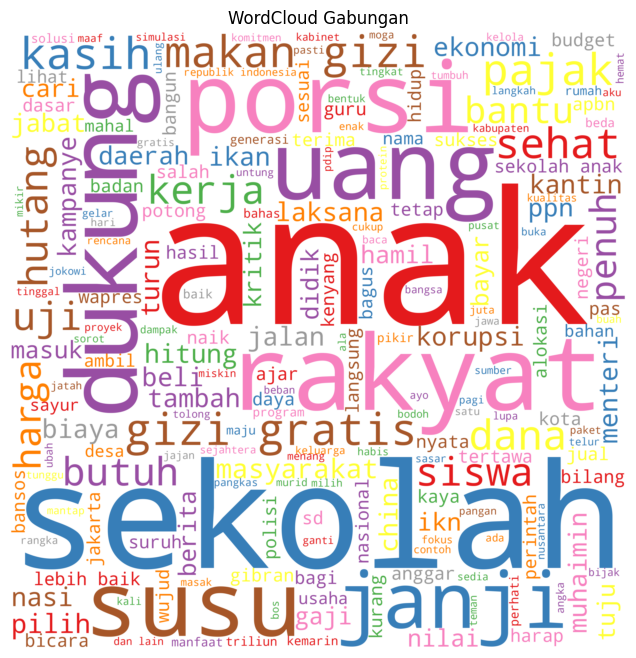

In [ ]:
# Gabungkan semua teks dari kolom 'stemming' dalam DataFrame df_positif
all_text_gab = ' '.join(word for word in dfWC['WC'].astype(str))

# Buat WordCloud dengan parameter yang telah disesuaikan
wordcloud = WordCloud(
    colormap='Set1',
    width=1000,
    height=1000,
    mode='RGBA',
    background_color='white',
    max_font_size=300,       # Set ukuran font maksimum yang lebih besar
    relative_scaling=0.5,    # Set scaling relatif untuk membuat kata-kata lebih rapat
    scale=3,                 # Set skala untuk meningkatkan resolusi
    # max_words=10             # Set limitasi kata
).generate(all_text_gab)

# Tampilkan WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Gabungan')
plt.margins(x=0, y=0)
plt.show()

Kata-kata "anak", "sekolah", "gizi", "siswa", "gratis", dan "susu" mencerminkan perhatian pada pemenuhan gizi anak sekolah.


###WordCloud Positif

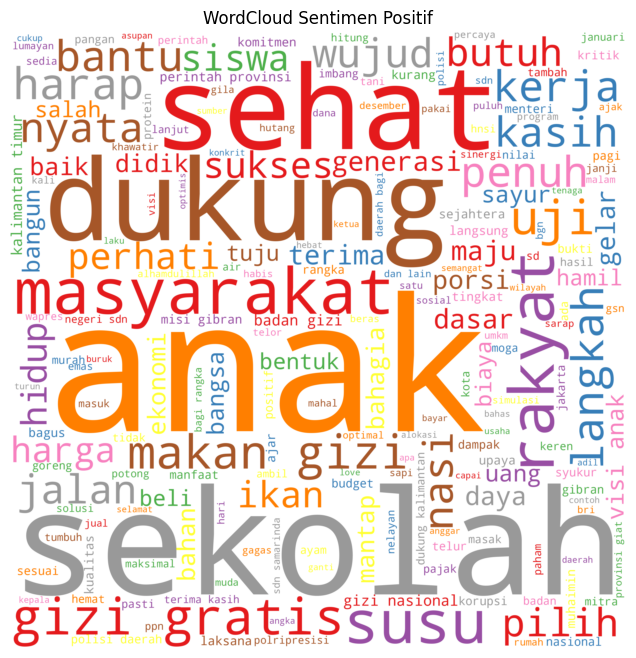

In [ ]:
# Gabungkan semua teks dari kolom 'stemming' dalam DataFrame df_positif
all_text_s1 = ' '.join(word for word in df_positif['WC'].astype(str))

# Buat WordCloud dengan parameter yang telah disesuaikan
wordcloud = WordCloud(
    colormap='Set1',
    width=1000,
    height=1000,
    mode='RGBA',
    background_color='white',
    max_font_size=300,       # Set ukuran font maksimum yang lebih besar
    relative_scaling=0.5,    # Set scaling relatif untuk membuat kata-kata lebih rapat
    scale=3,                 # Set skala untuk meningkatkan resolusi
    # max_words=10             # Set limitasi kata
).generate(all_text_s1)

# Tampilkan WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Positif')
plt.margins(x=0, y=0)
plt.show()

Kata-kata "kerja", "sehat", "dukung", dan "bantu" menekankan tanggung jawab pemerintah untuk meningkatkan kesejahteraan generasi muda, serta menunjukkan sentimen positif dari data.

###WordCloud Negatif

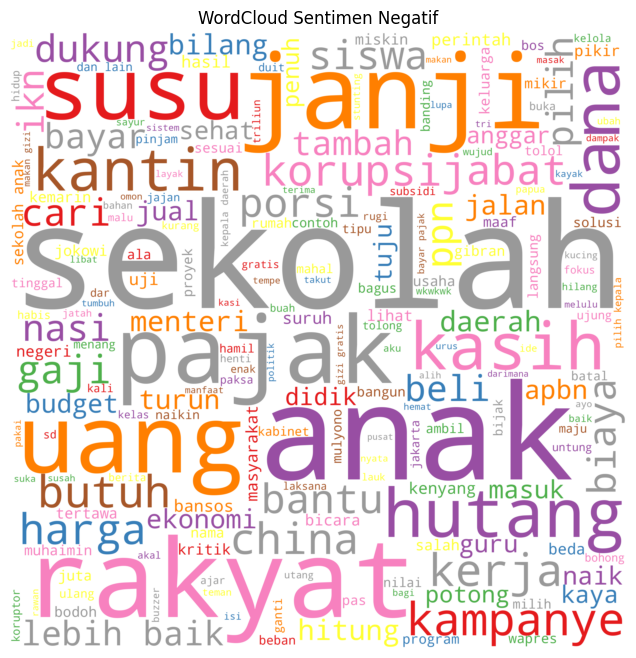

In [ ]:
# Gabungkan semua teks dari kolom 'stemming' dalam DataFrame df_positif
all_text_s2 = ' '.join(word for word in df_negatif['WC'].astype(str))

# Buat WordCloud dengan parameter yang telah disesuaikan
wordcloud = WordCloud(
    colormap='Set1',
    width=1000,
    height=1000,
    mode='RGBA',
    background_color='white',
    max_font_size=300,       # Set ukuran font maksimum yang lebih besar
    relative_scaling=0.5,    # Set scaling relatif untuk membuat kata-kata lebih rapat
    scale=3,                 # Set skala untuk meningkatkan resolusi
    # max_words=10             # Set limitasi kata
).generate(all_text_s2)

# Tampilkan WordCloud
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud Sentimen Negatif')
plt.margins(x=0, y=0)
plt.show()


Kata-kata "kritik", "harga", "turun", "janji", dan "pajak" menggambarkan keluhan masyarakat terkait anggaran yang dianggap tidak mencukupi.

Kata-kata "kurang", "biaya", "butuh", dan "kenyang" menyoroti tantangan implementasi, dengan anggapan harga Rp10.000 tidak realistis.

Kata-kata "korupsi", "utang", dan "alokasi" mencerminkan kecurigaan terhadap pengelolaan dana yang memengaruhi kepercayaan masyarakat

## Tren Percakapan

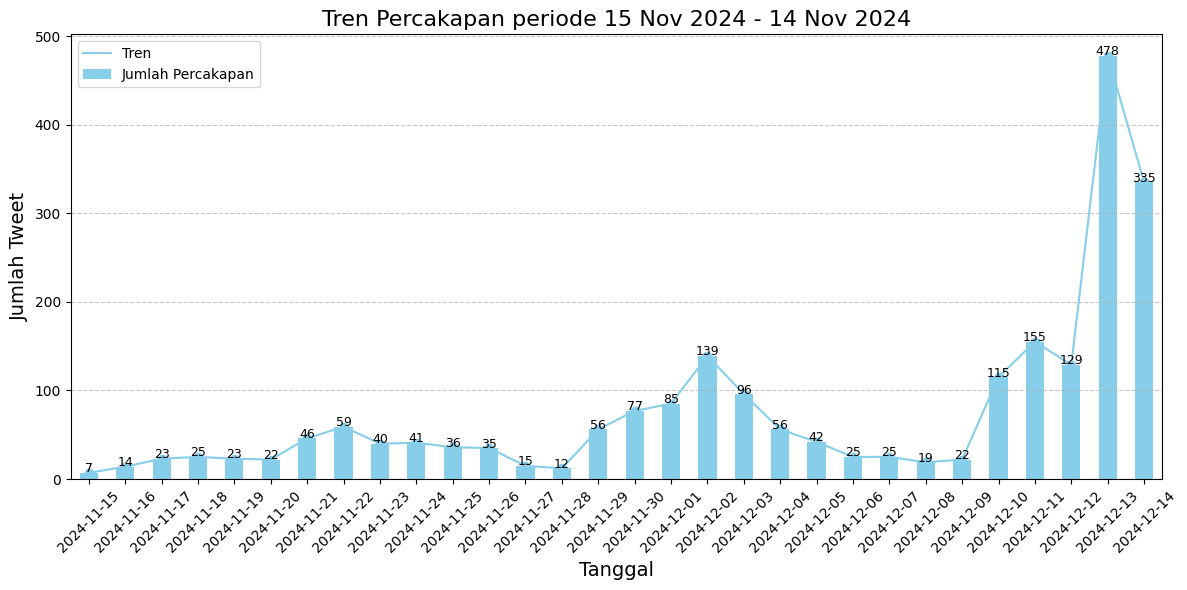

In [ ]:
# Step 2: Grupkan data berdasarkan tanggal
counts_per_day = df['created_at'].value_counts().sort_index()

# Step 3: Plot jumlah tweet per hari dengan garis tren dan titik
plt.figure(figsize=(12, 6))

# Plot batang jumlah tweet per hari
counts_per_day.plot(kind='bar', color='skyblue', label='Jumlah Percakapan')

# Tambahkan garis tren menggunakan seaborn
sns.lineplot(data=counts_per_day.values, color='skyblue', label='Tren')

# Tambahkan titik pada garis tren
for i, count in enumerate(counts_per_day.values):
    plt.scatter(i, count, color='skyblue')
    plt.text(i, count + 0.5, str(count), ha='center', fontsize=9)

plt.title('Tren Percakapan periode 15 Nov 2024 - 14 Nov 2024', fontsize=16)
plt.xlabel('Tanggal', fontsize=14)
plt.ylabel('Jumlah Tweet', fontsize=14)
plt.xticks(range(len(counts_per_day)), counts_per_day.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.tight_layout()
plt.show()


Dapat dilihat dari garfik bahwa peningkatan teren pembahasan di media sosial terjadi mulai tanggal 28 November 2024 dan terus mengalami kenaikan teren sampai dengan puncaknya pada tanggal 13 Desember 2024

## Analisis Sentimen

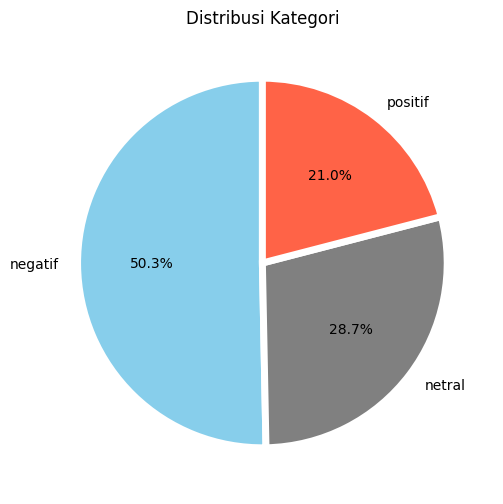

In [ ]:
colors = {'positif': '#FF6347', 'negatif': 'skyblue', 'netral': 'gray'}

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    df['label sentimen'].value_counts(),
    labels = df['label sentimen'].value_counts().index,
    autopct = '%1.1f%%',
    startangle = 90,
    wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' },
    #explode = [0.1 if k == 'positif' else 0 for k in df['label sentimen'].value_counts().index],
    colors=[colors[k] for k in df['label sentimen'].value_counts().index]  # Gunakan warna khusus
)
plt.title('Distribusi Kategori')
plt.show()

**Positif 21.0%:**
* Antusisme para orangtua terkait program makan siang bergizi.
* Orang tua tidak khawatir mengenai gizi anak meraka.
* Berterima kasih karena pemerintah sudah mulai merealisasikan program makan siang bergizi.

**Negatif 50.3%:**
* Skeptis terkait biaya yang dikerahkan untuk makan siang bergizi dengan tarif Rp 10.000 per anak.
* Kekhawatiran anggaran yang akan sampai ke vendor nantinya tidak sesuai dengan yang telah digelontorkan oleh pemerintah.
* Meminta pemerintah meninjau ulang terkait realisasi program.

**Netral 28.7%:**
* Cuitan yang berisi berita makan siang bergizi dengan tarif Rp 10.000.
* Cuitan tanggapan dari beberapa tokoh masyarakat dan politik.

## TOP Pemengaruh

In [ ]:
dfp = df[['username', 'favorite_count','quote_count', 'reply_count', 'retweet_count']]
dfp['engagements'] = dfp[['favorite_count','quote_count', 'reply_count', 'retweet_count']].transpose().sum()
dfp = dfp.sort_values(by='engagements', ascending=False).reset_index(drop=True)
dfp = dfp[['username','engagements']]
dfp.head(10)

<ipython-input-54-923d003539a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfp['engagements'] = dfp[['favorite_count','quote_count', 'reply_count', 'retweet_count']].transpose().sum()


,username,engagements
0,realfedinuril,38544
1,kkmanti,15644
2,hermawan_devina,13905
3,andikamalreza,8757
4,gatauahdark,1957
5,JhonSitorus_18,1649
6,kompascom,1515
7,afrkml,1485
8,narkosun,1266
9,kompascom,1174


In [ ]:
a = dfp.groupby("username")['engagements'].sum()
b = a.to_dict()
dfp = pd.DataFrame({  'username': b.keys(),
                'engagements': b.values()})
dfp = dfp.sort_values(by='engagements', ascending=False).reset_index(drop=True)
dfp.head(10)

,username,engagements
0,realfedinuril,38544
1,kkmanti,15644
2,hermawan_devina,13905
3,andikamalreza,8757
4,kompascom,2824
5,JhonSitorus_18,1963
6,gatauahdark,1957
7,afrkml,1485
8,narkosun,1266
9,PasTIGAma2024,788


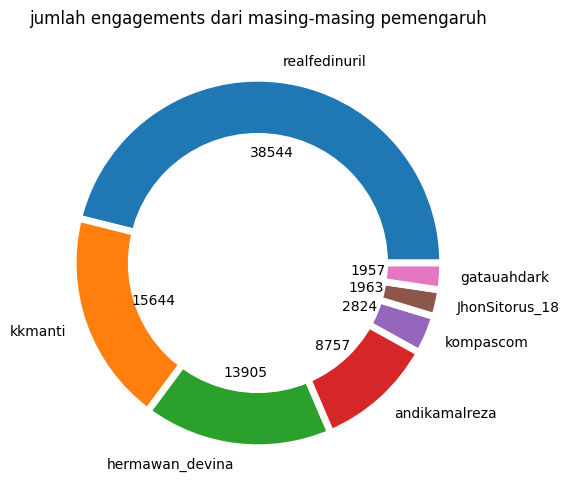

In [ ]:
def absolute_value(val):
    total = sum(dfp.head(7)['engagements'].to_list())
    return f"{int(round(val * total / 100))}"

# Plot pie chart
#labels = [f"{username}\n{count} engagements" for username, count in zip(dfp.head(7)['username'], dfp.head(7)['engagements'])]
plt.figure(figsize=(6, 6))
plt.pie(
    dfp.head(7)['engagements'],
    labels = dfp.head(7)['username'].value_counts().index,
    autopct = absolute_value,
    startangle = 0,
    wedgeprops = { 'linewidth' : 5, 'edgecolor' : 'white' },
    #explode = [0.1 if k == 'positif' else 0 for k in dfpp['sentimen'].value_counts().index],
    #colors=[colors[k] for k in dfpp['sentimen'].value_counts().index]  # Gunakan warna khusus
)
plt.title('jumlah engagements dari masing-masing pemengaruh')
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()

Berdasarkan pie chart diatas, didapat informasi TOP 7 akun didominasi akun kontra pemerintah

Akun Kontra Pemerintah
* @realfedinuril
* @kkmanti
* @hermawan_devina
* @andikamalreza
* @jhonsitorus_18
* @gatauahdark

Akun Media
* @kompascom

## Mention Terbanyak

In [ ]:
def simpan_mention(lst):
    hasil = {}
    for i in lst:
        simpan = ''
        for j in i:
            if j == ' ':
                if simpan:
                    if simpan in hasil:
                        hasil[f'{simpan}'] += 1
                    elif simpan not in hasil:
                        hasil[f'{simpan}'] = 1
                simpan = ''
            if simpan and j != ' ':
                simpan += j
            if not simpan and j == '@':
                simpan = '@'
    return hasil

mention = simpan_mention(df['full_text'].to_list())
mention = dict(sorted(mention.items(), key=lambda x: x[1], reverse=True))
mention = pd.DataFrame({  'username': mention.keys(),
                    "count": mention.values()})
mention[(mention['count'] < 300) & (mention['count'] > 15)]

,username,count
0,@prabowo,303
1,@IrawanRommi,96
2,@penjaga_nkri45,93
3,@Kimberley_PS08,59
4,@Gerindra,55
...,...,...
765,@henrysubiakto,1
766,@Agung_a_saputro,1
767,@anggadwia_,1
768,@txtdengardulu,1


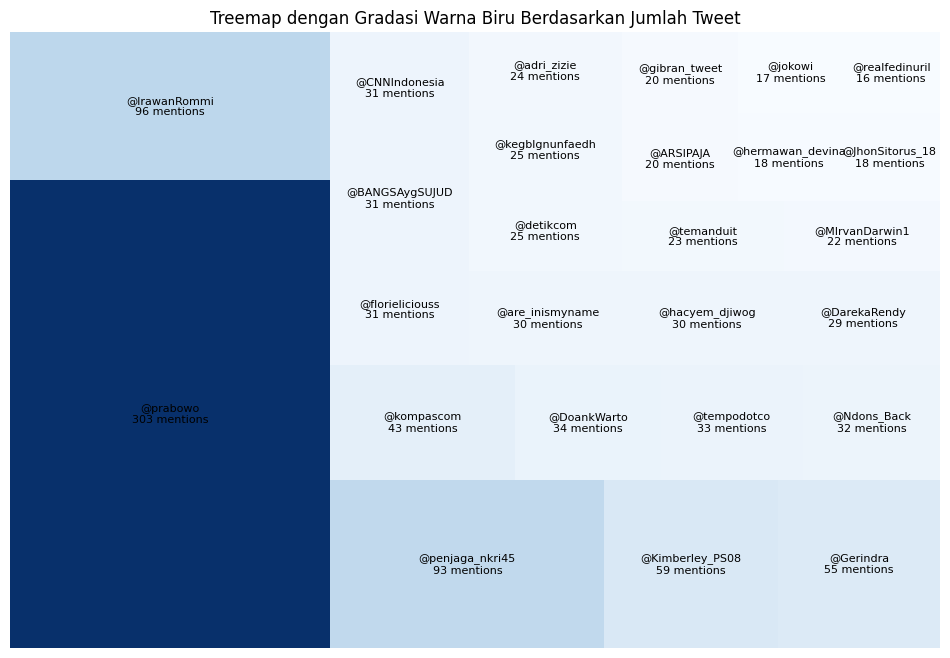

In [ ]:
mention_plot = mention[mention['count'] > 15]

# Menentukan ukuran font berdasarkan ukuran kotak (count)
max_count = max(mention_plot['count'])  # Nilai maksimum sebagai acuan
font_sizes = [10 + (size / max_count) * 20 for size in mention_plot['count']]  # Skala ukuran font

# Membuat label dengan ukuran font yang disesuaikan
labels = [f"{username}\n{count} mentions" for username, count in zip(mention_plot['username'], mention_plot['count'])]

# Menentukan gradasi warna biru berdasarkan count
norm = mcolors.Normalize(vmin=min(mention_plot['count']), vmax=max(mention_plot['count']))
colors = [plt.cm.Blues(norm(count)) for count in mention_plot['count']]

# Plot treemap
plt.figure(figsize=(12, 8))  # Ukuran figure
squarify.plot(  sizes=mention_plot['count'],
                label=labels,
                color=colors,
                text_kwargs={'fontsize': 8, 'color': 'black'})  # Warna teks

# Menambahkan judul
plt.title('Treemap dengan Gradasi Warna Biru Berdasarkan Jumlah Tweet')

# Menghapus axis
plt.axis('off')

# Menampilkan treemap
plt.show()

Akun @prabowo menjadi pusat perhatian dengan jumlah mention tertinggi, yaitu 303 mentions, terkait program "makan siang bergizi" yang ia cetuskan. Namun, tingginya mention ini didominasi oleh pihak yang kontra, menunjukkan adanya kontroversi di masyarakat mengenai program tersebut.

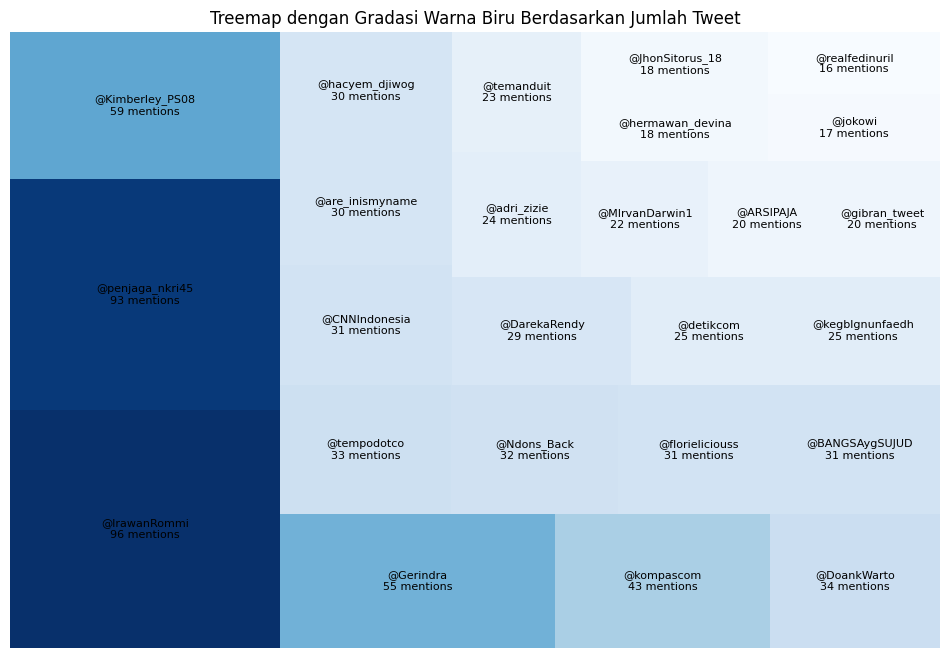

In [ ]:
mention_plot = mention[(mention['count'] < 300) & (mention['count'] > 15)]

# Menentukan ukuran font berdasarkan ukuran kotak (count)
max_count = max(mention_plot['count'])  # Nilai maksimum sebagai acuan
font_sizes = [10 + (size / max_count) * 20 for size in mention_plot['count']]  # Skala ukuran font

# Membuat label dengan ukuran font yang disesuaikan
labels = [f"{username}\n{count} mentions" for username, count in zip(mention_plot['username'], mention_plot['count'])]

# Menentukan gradasi warna biru berdasarkan count
norm = mcolors.Normalize(vmin=min(mention_plot['count']), vmax=max(mention_plot['count']))
colors = [plt.cm.Blues(norm(count)) for count in mention_plot['count']]

# Plot treemap
plt.figure(figsize=(12, 8))  # Ukuran figure
squarify.plot(  sizes=mention_plot['count'],
                label=labels,
                color=colors,
                text_kwargs={'fontsize': 8, 'color': 'black'})  # Warna teks

# Menambahkan judul
plt.title('Treemap dengan Gradasi Warna Biru Berdasarkan Jumlah Tweet')

# Menghapus axis
plt.axis('off')

# Menampilkan treemap
plt.show()

Akun @irawanRommi memiliki mention terbanyak dengan jumlah 96 mentions dalam pembahasan program makan siang gratis karena beliau sering membuat ciutan twitter yang membahas seputar makan siang bergizi dalam arah positif, namun akhir-akhir ini program makan siang bergizi menjadi tidak jelas arahnya dan selalu menurun untuk patokan harga makanannya menjadi 10.000 sedangkan banyak masyarakat yang beropini bahwa untuk makan siang bergizi dengan harga 10.000 masih kurang untuk gizi anak sekolah.

## Tagar Terbanyak

In [ ]:
def simpan_tagar(lst):
    hasil = {}
    for i in lst:
        simpan = ''
        for j in i:
            if j == ' ':
                if simpan:
                    if simpan in hasil:
                        hasil[f'{simpan}'] += 1
                    elif simpan not in hasil:
                        hasil[f'{simpan}'] = 1
                simpan = ''
            if simpan and j != ' ':
                simpan += j
            if not simpan and j == '#':
                simpan = '#'
    return hasil

tagar = simpan_tagar(df['full_text'].to_list())
tagar = dict(sorted(tagar.items(), key=lambda x: x[1], reverse=True))
tagar = pd.DataFrame({  'username': tagar.keys(),
                    "count": tagar.values()})
tagar

,username,count
0,#PEKNAS,23
1,#Prabowo,15
2,#BadanGiziNasional,15
3,#MakanBergiziGratis,12
4,#makangratis,12
...,...,...
325,#humaspoldametrojaya,1
326,#kapolrestangerangselatan,1
327,#JakartaNoMulyono,1
328,#TimnasDay,1


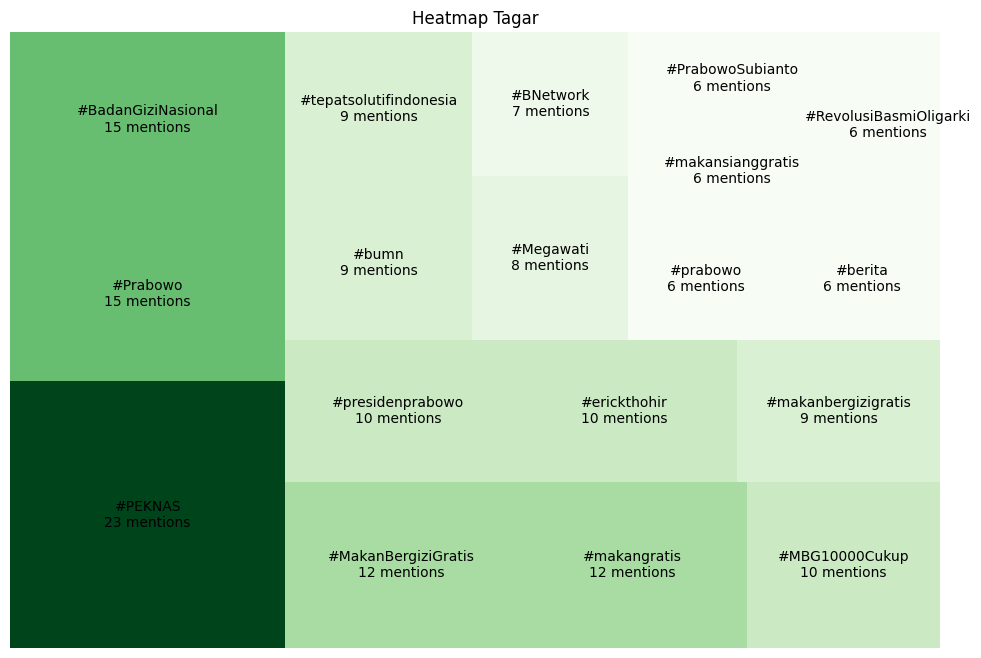

In [ ]:
tag_plot = tagar[tagar['count'] > 5]

# Menentukan ukuran font berdasarkan ukuran kotak (count)
max_count = max(tag_plot['count'])  # Nilai maksimum sebagai acuan
font_sizes = [10 + (size / max_count) * 20 for size in tag_plot['count']]  # Skala ukuran font

# Membuat label dengan ukuran font yang disesuaikan
labels = [f"{username}\n{count} mentions" for username, count in zip(tag_plot['username'], tag_plot['count'])]

# Menentukan gradasi warna biru berdasarkan count
norm = mcolors.Normalize(vmin=min(tag_plot['count']), vmax=max(tag_plot['count']))
colors = [plt.cm.Greens(norm(count)) for count in tag_plot['count']]

# Plot treemap
plt.figure(figsize=(12, 8))  # Ukuran figure
squarify.plot(  sizes=tag_plot['count'],
                label=labels,
                color=colors,
                text_kwargs={'fontsize': 10, 'color': 'black'})  # Warna teks

# Menambahkan judul
plt.title('Heatmap Tagar')

# Menghapus axis
plt.axis('off')

# Menampilkan treemap
plt.show()

Berdasarkan treemap diatas :
- Tagar paling banyak dipakai dalam tweet mengenai makan siang bergizi adalah #PEKNAS sebanyak 23 mention, yang bisa kita pahami banyak masyarakat yang membuat ciutan yang langsung ditujukan kepada Penguatan Ekonomi Kerakyatan Nasional dengan maksud agar mudah di jangkau oleg pihak PEKNAS.
- Tagar #Prabowo dan #BadanGiziNasional memiliki jumlah tagar yang sama yaitu 15 mentions, dikarenakan program makan siang bergizi ini adalah salah satu program masa pemerintahan prabowo namun dengan budget Rp10.000 badan gizi nasional perlu mempertimbangkan apakah itu bisa memenuhi kebutuhan gizi bagi anak sekolah

## Pengaruh Banyak Postingan

In [ ]:
dfr = df[['username', 'full_text', 'favorite_count', 'quote_count', 'reply_count', 'retweet_count']]
dfr['engagement'] = dfr[['favorite_count','quote_count', 'reply_count', 'retweet_count']].transpose().sum()
dfr = dfr[['username', 'engagement']]
a = dfr.groupby('username').count()
b = dfr.groupby('username').sum()
b['jumlah_tweet'] = a['engagement']
dfr = b.sort_values(by='jumlah_tweet', ascending=False).head(10)
dfr

<ipython-input-7-62a6ec26cb9a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfr['engagement'] = dfr[['favorite_count','quote_count', 'reply_count', 'retweet_count']].transpose().sum()


,engagement,jumlah_tweet
username,,
officialinews_,31,14
Beritasatu,8,11
KompasTV,384,10
kompascom,2824,8
detikcom,115,8
Zay34562,91,8
tvOneNews,101,7
khojan_,6,7
Metro_TV,92,7


<ipython-input-8-93302f4bda38>:31: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(dfr['username'], rotation=45)


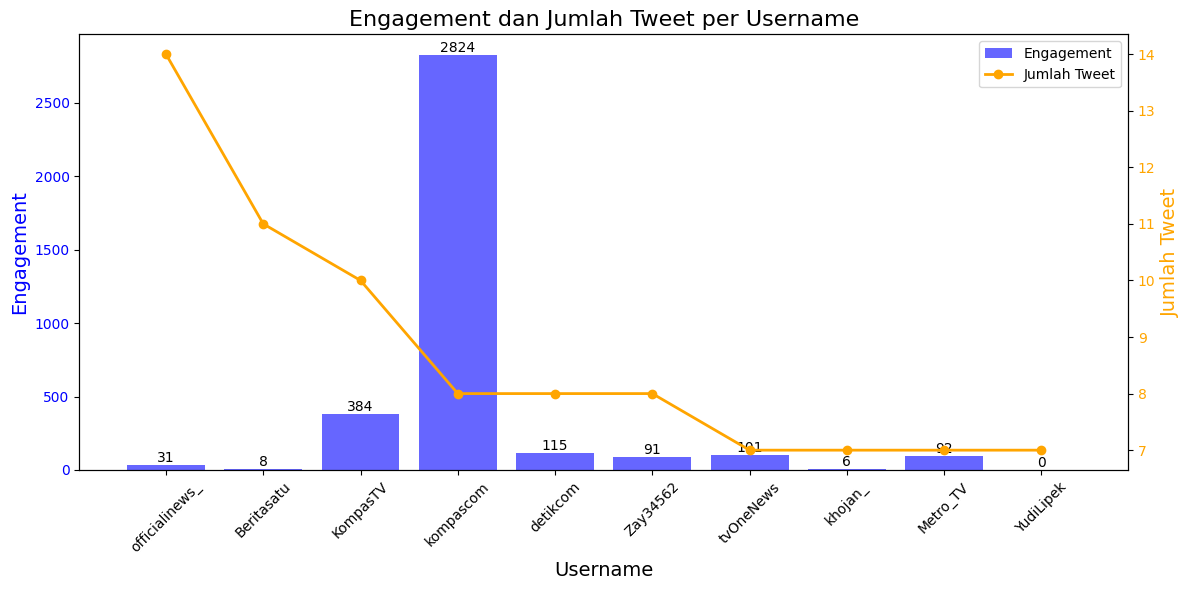

In [ ]:
dfr = dfr.reset_index().rename(columns={"index": "username1"})

# Membuat figure dan axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Engagement (Barplot)
bars = ax1.bar(dfr['username'], dfr['engagement'], color='blue', alpha=0.6, label='Engagement')
ax1.set_ylabel('Engagement', color='blue', fontsize=14)
ax1.tick_params(axis='y', labelcolor='blue')

# Menambahkan nilai di atas barplot
for bar in bars:
    ax1.text(bar.get_x() + bar.get_width() / 2,  # Posisi X
             bar.get_height(),                  # Posisi Y
             f'{bar.get_height()}',             # Nilai
             ha='center', va='bottom', fontsize=10)  # Style

# Tambahkan sumbu y kedua untuk Jumlah Tweet
ax2 = ax1.twinx()
line = ax2.plot(dfr['username'], dfr['jumlah_tweet'], color='orange', marker='o', label='Jumlah Tweet', linewidth=2)
ax2.set_ylabel('Jumlah Tweet', color='orange', fontsize=14)
ax2.tick_params(axis='y', labelcolor='orange')

# Menambahkan nilai di atas titik line plot
#for i, txt in enumerate(dfr['jumlah_tweet']):
#    ax2.text(i, txt, f'{txt}', color='red', fontsize=10, ha='center', va='bottom')

# Judul dan Label
ax1.set_xlabel('Username', fontsize=14)
plt.title('Engagement dan Jumlah Tweet per Username', fontsize=16)
ax1.set_xticklabels(dfr['username'], rotation=45)

# Menambahkan Legenda
fig.legend(loc='upper right', bbox_to_anchor=(1, 1), bbox_transform=ax1.transAxes)

# Tata letak rapi
plt.tight_layout()
plt.show()

Berdasarkan plot diatas:
- Username dengan Engagement Tinggi meskipun Sedikit Postingan:Kompascom dengan engagement mencapai 2824, tetapi jumlah postinganrelatif sedikit dibanding username lain. Hal ini menunjukkan bahwa kualitas atau daya tarik konten lebih berpengaruh daripada kuantitas postingan.

- Username dengan Banyak Postingan tapi Engagement Rendah: Metro_TV dan Khojan_ memiliki lebih banyak tweet dibanding beberapa username lain, tetapi engagement mereka sangat rendah. Hal ini mengindikasikan bahwa sekadar memposting banyak konten tidak cukup jika kontennya tidak relevan atau menarik bagi audiens.

- Efisiensi Konten: Username seperti KompasTV memiliki engagement cukup tinggi (384) dibandingkan username dengan jumlah tweet yang sama atau lebih sedikit, seperti detikcom (115). Namun, mereka masih kalah jauh dari kompascom, yang artinya pendekatan konten kompascom lebih efektif.

##Analisis graph mention dan reply


In [ ]:
# Draw the Tweet Graph
G=nx.Graph()
for i, tweet in tqdm(df.iterrows()):
    if tweet.username not in G.nodes():
        G.add_node(tweet.username)
    mentionS =  re.findall("@([a-zA-Z0-9]{1,15})", tweet['full_text'])
    for mention in mentionS:
        if "." not in mention: #skipping emails
            usr = mention.replace("@",'').strip()
            if usr not in G.nodes():
                G.add_node(usr)
            G.add_edge(tweet.username, usr)
Nn=G.number_of_nodes();Ne=G.number_of_edges()
print('\nFinished. There are %d nodes and %d edges in the Graph.' %(Nn,Ne))

# Informasi graf
print("Jumlah Node:", G.number_of_nodes())
print("Jumlah Edge:", G.number_of_edges())

2252it [00:00, 4346.23it/s]


Finished. There are 2484 nodes and 2324 edges in the Graph.
Jumlah Node: 2484
Jumlah Edge: 2324


In [ ]:
nx.write_graphml(G, "twitter_graph_makansiang.graphml")

graph diekspor kemudian dilakukan analisis menggunakan software lain. kami menggunakan gephi untuk mencari hubungan dan keterkaitan yang relevan

![picture](https://drive.google.com/uc?id=1TmkfiENEMCUyBuWWUdbh02vP_IV9FCxX)

Pembicaraan di twitter didominasi oleh klaster kontra (warna merah) yang berada di tengah. Samar samar terlihat terdapat graf yang membentuk lingkaran besar yang di luar jangkauan dari graf di tengah. Kemudian pada bagian atas kanan (arah jam 1) terdapat sekelompok graf berwarna hijau.

![picture](https://drive.google.com/uc?id=1pB--aV6VJ8jSUaG8Wl11KV0a7Y5cQv-6)

Bila dilakukan zoom in graf sebelumnya, bagian tengah terlihat lebih jelas. Akun @prabowo menjadi pusat dari perbincangan pada topik ini. Klaster kontra (warna merah) mendominasi pada graf di bagian tengah, menunjukkan banyak sentimen negatif terhadap program anggaran Rp10.000 untuk makan siang gratis.

Kemudian terdapat klaster media (warna biru) dan klaster pro (warna hijau). Awak media turun memberitakan program ini, tidak kalah juga beberapa akun yang turut mendukung dari program ini.

![picture](https://drive.google.com/uc?id=1f8iNRpb_PcOv7TO3qyqNCpR9_pbm2nR5)

Bila dilakukan zoom in pada graf awal, terdapat sekelompok graf pada bagian luar (arah jam 1 dari graf awal). Setelah kami telusuri, sekelompok graf ini menunjukkan bahwa akun-akun tersebut pro terhadap program anggaran Rp10.000 makan siang gratis. Kemudian mereka terletak berada jauh dari tengah tengah karena akun-akun pada bagian ini hanya berinteraksi pada sesamanya.

# Kesimpulan



*   Reaksi publik yang cenderung negatif menunjukkan bahwa makan siang bergizi gratis Rp10.000 kurang diterima oleh publik dari berbagai kalangan yang menilai kebijakan ini tidak efektif dan efisien.

*   Kritik publik pada umumnya mempersoalkan tentang bagaimana pendistribusian akan dilakukan dan apakah makan siang Rp10.000 benar-benar bisa bergizi






# Rekomendasi



*   Melakukan evaluasi kebutuhan anggaran dengan menganalisis secara menyeluruh oleh ahli gizi mengenai standar gizi yang seimbang bagi anak sekolah disertai dengan pertimbangan faktor geografis untuk wilayah terpencil.

*   Transparansi pengelolaan dana dengan sistem digital agar masyarakat dapat memantau secara real-time dengan detail anggaran termasuk alokasi dana per daerah dan harga bahan makanan.

*   Melibatkan masyarakat secara langsung dengan bekerja sama bersama UMKM atau warung lokal, seperti memanfaatkan kantin sekolah untuk menyuplai makan yang bergizi sesuai dengan hasil pertimbangan menu dari ahli gizi.










